In [90]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401 (needed for 3D)
import os

In [91]:
def emissions_aviation_fuel():
    return 9.5  # kg CO2 per gallon

def emissions_saf():
    return 3.78  # kg CO2 per gallon

def revenue():
    return 9.7  # billion dollars

def operating_cost():
    return 5.66  # billion dollars without fuel

def fuel_qty():
    return 1.495  # billion gallons (fixed baseline per user)

'''
Conventional aviation fuel (CAF):

Mature production chain, global refining capacity, stable costs.

Low supply elasticity → price doesn’t rise much with small output changes.

Typical elasticity ≈ 0.1–0.3.

Sustainable aviation fuel (SAF):

Emerging technology, limited feedstock, scaling challenges.

High supply elasticity → price rises sharply if demand increases.

Typical elasticity ≈ 0.5–1.0 or even higher.
'''

def aviation_fuel_price(qty):
    p0 = 2.10     # base price ($/gal)
    q0 = 1.495    # baseline qty (billion gal)
    elasticity = 0.1   # supply elasticity
    return p0 * (qty / q0)**(1/elasticity)

def saf_price(qty):
    p0 = 6.3
    q0 = 1.495
    elasticity = 0.8
    return p0 * (qty / q0)**(1/elasticity)

Maximum profit = 2.335 billion $ at alpha = 0.190


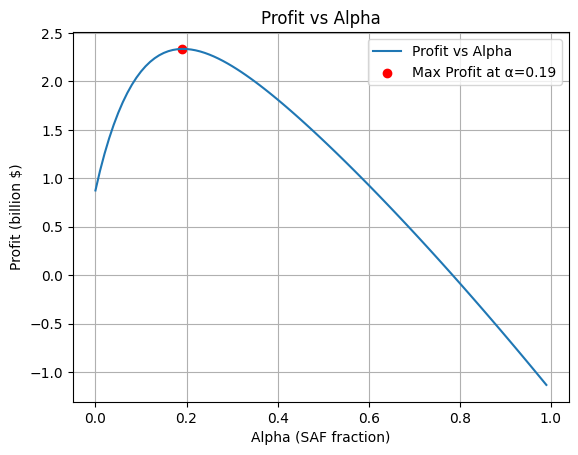

In [95]:
def compute_profit(alpha, subsidy_per_gal, carbon_tax_per_ton):
    """
    alpha: SAF blend fraction in [0,1] (fraction of total fuel that is SAF)
    subsidy_per_gal: $/gal subsidy paid for SAF
    carbon_tax_per_ton: $/ton CO2
    Returns profit in billion $ and breakdown dict
    """
    # quantities in billion gallons
    q_total_b = fuel_qty()
    q_saf_b = q_total_b * alpha
    q_conv_b = q_total_b * (1.0 - alpha)

    # unit prices ($/gal)
    p_conv = aviation_fuel_price(q_conv_b)
    p_saf = saf_price(q_saf_b)

    # fuel cost in billion $
    fuel_cost_b = p_conv + p_saf

    # carbon tax: carbon_tax_billion = tau ($/ton) * emissions_kg_per_gal * qty_billion / 1000
    tau = carbon_tax_per_ton
    carbon_tax_conv_b = tau * emissions_aviation_fuel() * q_conv_b / 1000.0
    carbon_tax_saf_b = tau * emissions_saf() * q_saf_b / 1000.0
    carbon_tax_b = carbon_tax_conv_b + carbon_tax_saf_b

    # subsidy income in billion $ (applies only to SAF gallons)
    subsidy_income_b = subsidy_per_gal *q_saf_b

    # profit (billion $)
    profit_b = revenue() - operating_cost() - fuel_cost_b - carbon_tax_b + subsidy_income_b

    return profit_b






import numpy as np

alpha = np.linspace(0,0.99,100)
profit = []

for i in range (0,len(alpha)):
  profit.append(compute_profit(alpha[i],1.0, 75))

profit = np.array(profit)
max_index = np.argmax(profit)
alpha_max = alpha[max_index]
profit_max = profit[max_index]

print(f"Maximum profit = {profit_max:.3f} billion $ at alpha = {alpha_max:.3f}")

plt.plot(alpha, profit, label='Profit vs Alpha')
plt.scatter(alpha_max, profit_max, color='red', label=f'Max Profit at α={alpha_max:.2f}')
plt.title('Profit vs Alpha')
plt.xlabel('Alpha (SAF fraction)')
plt.ylabel('Profit (billion $)')
plt.legend()
plt.grid(True)
plt.show()


In [93]:
np.max(profit)

np.float64(3.3455696972195805)